In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from tensorflow.keras.datasets import cifar10

C:\Users\Hi\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
single_image=x_train[0]

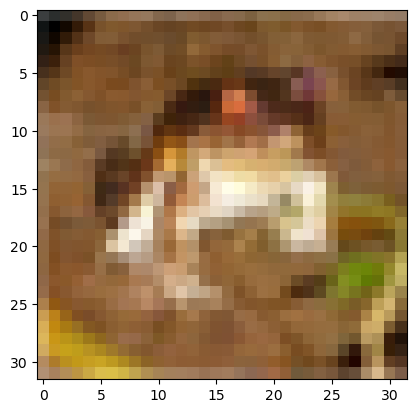

In [6]:
plt.imshow(single_image)

In [7]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [8]:
from tensorflow.keras.utils import to_categorical

In [9]:
y_train.shape

(50000, 1)

In [10]:
y_cat_train=to_categorical(y_train)

In [11]:
y_cat_test=to_categorical(y_test)

In [12]:
y_cat_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [13]:
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [14]:
x_train.max()

255

In [15]:
x_train=x_train/255

In [16]:
x_test=x_test/255

In [17]:
x_test

array([[[[0.61960784, 0.43921569, 0.19215686],
         [0.62352941, 0.43529412, 0.18431373],
         [0.64705882, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254902, 0.14117647],
         [0.49411765, 0.35686275, 0.14117647],
         [0.45490196, 0.33333333, 0.12941176]],

        [[0.59607843, 0.43921569, 0.2       ],
         [0.59215686, 0.43137255, 0.15686275],
         [0.62352941, 0.44705882, 0.17647059],
         ...,
         [0.53333333, 0.37254902, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509804, 0.13333333]],

        [[0.59215686, 0.43137255, 0.18431373],
         [0.59215686, 0.42745098, 0.12941176],
         [0.61960784, 0.43529412, 0.14117647],
         ...,
         [0.54509804, 0.38431373, 0.13333333],
         [0.50980392, 0.37254902, 0.13333333],
         [0.47058824, 0.34901961, 0.12941176]],

        ...,

        [[0.26666667, 0.48627451, 0.69411765],
         [0.16470588, 0.39215686, 0.58039216]

In [18]:
from tensorflow.keras.layers import Dense

In [19]:
from tensorflow.keras.models import Sequential

In [20]:
from tensorflow.keras.layers import MaxPool2D,Conv2D,Flatten

In [21]:
model=Sequential()

In [22]:
model.add(Conv2D(filters=32,kernel_size=(4,4),strides=(4,4),activation="relu",input_shape=(32,32,3)))
model.add(MaxPool2D(pool_size=(2,2)))

C:\Users\Hi\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [23]:
model.add(Conv2D(filters=(32),kernel_size=(2,2),activation="relu",input_shape=(32,32,3)))
model.add(MaxPool2D(pool_size=(2,2)))

In [24]:
model.add(Flatten())

In [25]:
model.add(Dense(128,activation="relu"))

In [26]:
model.add(Dense(10,activation="softmax"))

In [27]:
model.compile(loss="categorical_crossentropy",optimizer="adam")

In [29]:
model.fit(x=x_train,y=y_cat_train,validation_data=(x_test,y_cat_test),epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 1.6844 - val_loss: 1.5986
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 1.5767 - val_loss: 1.5897
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 1.5239 - val_loss: 1.5307
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 1.4822 - val_loss: 1.5110
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 1.4540 - val_loss: 1.4644


In [30]:
loss_df=pd.DataFrame(model.history.history)

<AxesSubplot:>

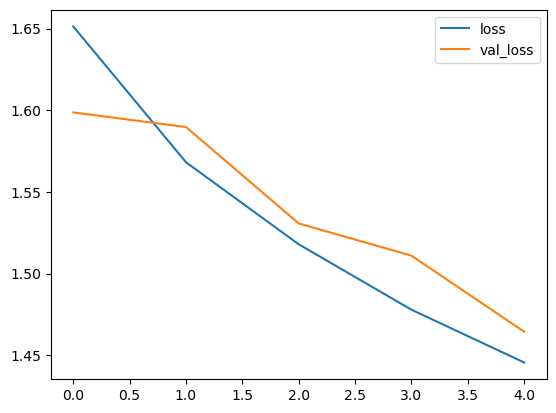

In [31]:
loss_df.plot(kind="line")

In [33]:
model.predict(single_image.reshape(-1,32,32,3))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [34]:
def predict_animal(animal):
    animal=animal.reshape(-1,32,32,3)
    ans=model.predict(animal)
    ans_list=list(ans)
    print(ans_list.index(max(ans_list)))
    

In [36]:
predict_animal(single_image.reshape(-1,32,32,3))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
0
